# Révision
- Quelques détails que j'avais manqué lors de l'intra
- TP1 (le solutionnaire ne sera pas remis)
- D'autres questions?

In [8]:
import numpy as np
from scipy.ndimage import correlate, convolve
import matplotlib.pyplot as plt
import imageio

## Question 1
Quelle serait le résultat d'une convolution entre **img** et le kernel **filter**? (en utilisant un padding de 0)
> Essayez de le faire à la main

In [84]:
img = [
    [1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1],
]

filter = [
    [2, 0, 0],
    [0, -1, 0],
    [0, 0, 0],
]

result = convolve(np.array(img), filter, mode="constant", cval=0)
print(result)

[[-1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2  1  0  0]
 [ 0  0 -1  1  0]
 [ 0  0  0  0 -1]]


## Question 2
Expliquer la transformer de fourier de **img**

### Étapes : 

* On lit, transforme en ton de gris puis normalise l'image.
  - `.mean(axis=2)` -> ton de gris avec la moyenne
  - `img / img.max()` -> transforme en valeurs entre 0 et 1
* On fait une transformée de fourrier (`fft2(img)`), on déplace le résultat pour obtenir la fréquence 0 au centre. (`fftshift`)
* On calcul la magnitude car la transformée de fourrier donne des nombres complexe. (`abs`)
* On applique un *log* car les pour mieux visualiser les bases fréquences qui sont surreprésentées. (`log`) On ajoute `1e-6`, car `log` de 0 n'existe pas et `1e-6` est un très petit nombre donc ça impacte peu la visualisation des valeurs non-nulles. Les valeurs précédement nulles deviennent `1e-6`, ainsi le `log` donne un nombre négatif dans ce cas (`-6` si si le `log` est en base 10).

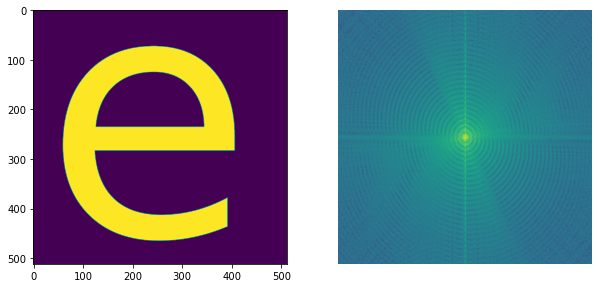

In [80]:
img = imageio.imread("e.png").mean(axis=2) 
img = img / img.max()

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(img)

fft = np.fft.fft2(img)
plt.subplot(122); plt.imshow(np.log(np.abs(np.fft.fftshift(fft)) + 1e-6)); plt.axis('off')

plt.show()

### Recommendations : 
* Changer l'image et faire des prédictions sur la transformé obtenue.
* Enlever le fftshift ou log
* Chercher à afficher la partie imaginaire ou la partie réelle et faite le lien avec votre cours 

## Observation: détramage d'un effet Moiré
Les étapes que j'avais fais pour restaurer cette image:
<img src="img.PNG" width="30%"
     alt="Error can't fetch img" />

1. Passer au domaine fréquentiel et mettre les basses fréquences au centre:
<img src="fft.PNG" width="30%"
     alt="Error can't fetch img" />

2. Appliquer un threshold de sorte à segmenter les étoiles
<img src="threshold.PNG" width="30%"
     alt="Error can't fetch img" />

3. Créer un masque qui retire les étoiles, mais qui conserve les basses fréquences (nos détails)
<img src="mask.PNG" width="30%"
     alt="Error can't fetch img" />

4. Multiplier notre transformer de Fourier avec notre masque (inversé) et revenir au domaine fréquentiel avec l'inverse de Fourier
<img src="result.PNG" width="30%"
     alt="Error can't fetch img" />

## Autres questions?
Sinon c'est tout :p